In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#libraries for visualization
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set(style = 'whitegrid')

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_iris = pd.read_csv('Iris.csv')

### Data understanding and visualizations

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


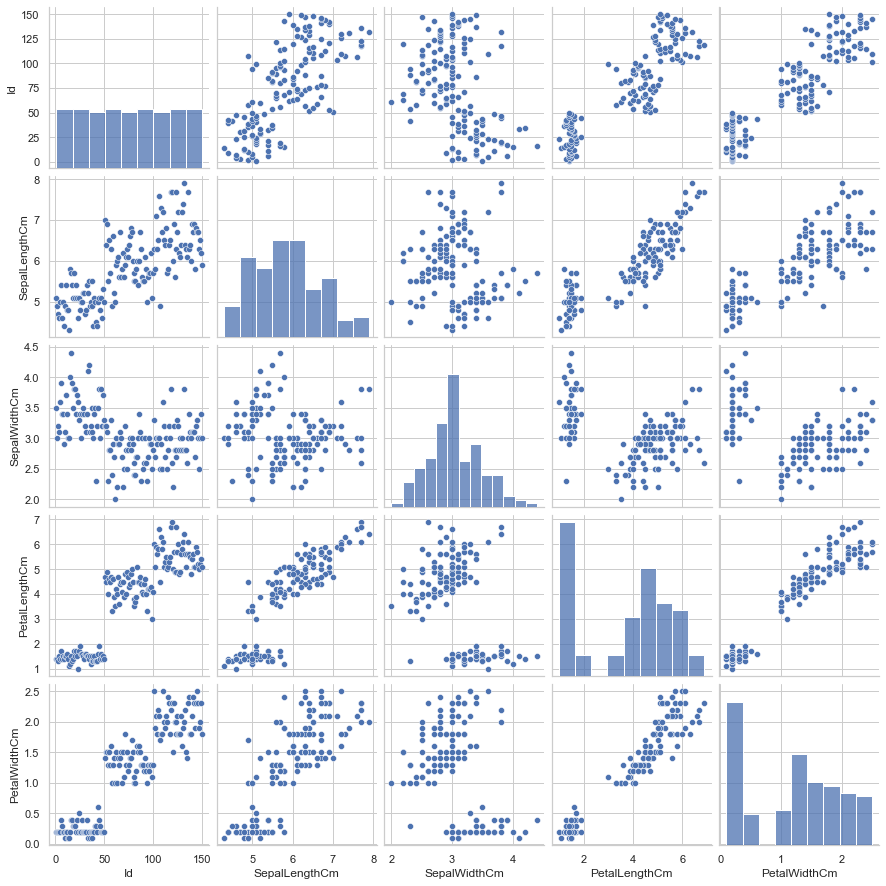

In [6]:
sns.pairplot(df_iris)

### Model building

In [7]:
x = df_iris.iloc[:, [0,1,2,3]].values

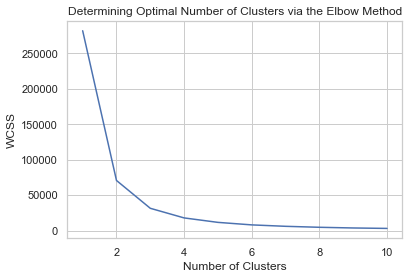

In [13]:
#Finding the optimal number of clusters for k-means clustering
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Plotting the results on line graph. 
plt.plot(range(1,11), wcss)
plt.title('Determining Optimal Number of Clusters via the Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS') #within cluster sum of squares 
plt.show()


It looks like the Elbow has the most significant bend between 2 and 4 clusters. So I will set the the number of clusters to equal 3 in the next step

In [16]:
#Creating a K Means clusterer
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

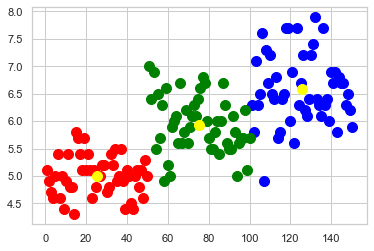

In [18]:
#Visualizing the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s =100, c = 'red', label = 'Iris_Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s =100, c = 'blue', label = 'Iris_Versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s =100, c = 'green', label = 'Iris_Virginica')

#Plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = "yellow", label = "Centers")


above is a plot of the clusters and the averaged center for each cluster. But something doesn't look right to me about this because it looks to perfect. I do know that this data set does indeed have 3 clusters because there are 3 different types of iris' within the set. and This was after 300 K Means clustering method interations. Even so I'm not sure if if the shape of this plot should suggest something wrong or signal that everything is how it should be. 

I would like to attempt clustering this same dataset using the agglomerative method next. And if time permits, try both of these methods with a less neat and more complex/interesting dataset that I know less about. 